In [1]:
%run credentials.ipynb

In [2]:
from sqlalchemy import create_engine

# Replace the following variables with your MySQL server details
host = 'localhost'
database_name = 'mysql'
port=3306

# Create a connection to the MySQL database
engine = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database_name}")

In [3]:
import sys
import logging

sys.path.append('Desktop/files/API/cedar-spring-392112-228c62e4d9a1.json')

from GA4Api import GA4Api, MatchType, Logical, Operation

gapi = GA4Api()

logging.basicConfig(level=logging.INFO)

In [4]:
import pandas as pd
from causalimpact import CausalImpact

In [5]:
# text group - y
property_name = 'vvcz'
start_date = "2024-01-01"
end_date = "2024-02-17"
metrics = [ 'purchaseRevenue', 'sessions', 'transactions', 'customEvent:crc', 'newUsers']
dimensions = [ 'date']
# campaign filters

df = gapi.get_report(property_name, start_date, end_date, metrics=metrics, dimensions=dimensions, limit=500_000)
df.head()

INFO:GA4Api:working on vvcz
INFO:GA4Api:current rows returned: 48
INFO:GA4Api:total rows returned: 48
INFO:GA4Api:total rows found: 48
INFO:GA4Api:quota information:
                                  quota_type  consumed  remaining
0                             tokens_per_day         5     199757
1                            tokens_per_hour         5      39770
2                        concurrent_requests         0         10
3         server_errors_per_project_per_hour         0         10
4  potentially_thresholded_requests_per_hour         0        120
5                tokens_per_project_per_hour         5      13839


,date,purchaseRevenue,sessions,transactions,customEvent:crc,newUsers
0,20240213,1064330.8199859988,16638,788,176652.41001500026,5824
1,20240214,1061964.8101339997,15877,756,169696.510038,5984
2,20240212,1006293.1900289987,16989,709,157004.02005199992,6121
3,20240111,828749.810157,22727,666,162322.9600910001,8295
4,20240110,774098.2900590006,19150,637,155777.99007099992,6927


In [6]:
# control group - x
property_name = 'vvcz'
start_date = "2024-01-01"
end_date = "2024-02-17"
metrics = [ 'purchaseRevenue', 'sessions', 'transactions', 'customEvent:crc', 'newUsers']
dimensions = [ 'date']

# campaign filters
dimension_filters = (
        'sessionSourceMedium',
        MatchType.CONTAINS,
        'zbozi.cz'
)

df_control1 = gapi.get_report(property_name, start_date, end_date, metrics=metrics, dimensions=dimensions, dimension_filters=dimension_filters, limit=500_000)
df_control1

INFO:GA4Api:working on vvcz
INFO:GA4Api:current rows returned: 48
INFO:GA4Api:total rows returned: 48
INFO:GA4Api:total rows found: 48
INFO:GA4Api:quota information:
                                  quota_type  consumed  remaining
0                             tokens_per_day         6     199751
1                            tokens_per_hour         6      39764
2                        concurrent_requests         0         10
3         server_errors_per_project_per_hour         0         10
4  potentially_thresholded_requests_per_hour         0        120
5                tokens_per_project_per_hour         6      13833


,date,purchaseRevenue,sessions,transactions,customEvent:crc,newUsers
0,20240129,45900.580021,208,17,6037.619993,111
1,20240128,30661.190004999997,215,10,5363.799975,110
2,20240122,30660.459957000003,232,15,3670.209982,120
3,20240213,30210.509993000007,266,14,5567.9200390000005,128
4,20240115,22103.950015000002,204,14,5894.290023,109
5,20240214,21465.13001,245,18,5884.479984,136
6,20240211,21303.68999,262,10,5500.8900200000007,152
7,20240121,20679.119971,214,13,3520.919972,132
8,20240109,20293.700020000004,192,16,5257.820009,105
9,20240123,20208.869985000005,225,18,4393.79994,125


In [7]:
# control group - x
property_name = 'vvcz'
start_date = "2024-01-01"
end_date = "2024-02-17"
metrics = [ 'purchaseRevenue', 'sessions', 'transactions', 'customEvent:crc', 'newUsers']
dimensions = [ 'date']

# campaign filters
dimension_filters = (
    (
        'sessionSourceMedium',
        MatchType.CONTAINS,
        'retargeting'
    )
)

df_control2 = gapi.get_report(property_name, start_date, end_date, metrics=metrics, dimensions=dimensions, dimension_filters=dimension_filters, limit=500_000)
df_control2

INFO:GA4Api:working on vvcz
INFO:GA4Api:current rows returned: 48
INFO:GA4Api:total rows returned: 48
INFO:GA4Api:total rows found: 48
INFO:GA4Api:quota information:
                                  quota_type  consumed  remaining
0                             tokens_per_day         5     199746
1                            tokens_per_hour         5      39759
2                        concurrent_requests         0         10
3         server_errors_per_project_per_hour         0         10
4  potentially_thresholded_requests_per_hour         0        120
5                tokens_per_project_per_hour         5      13828


,date,purchaseRevenue,sessions,transactions,customEvent:crc,newUsers
0,20240118,70152.570038,3293,55,14190.050052000002,265
1,20240204,67473.010018,2071,38,15958.529991999996,194
2,20240120,63417.089977,2119,37,12648.159994000001,187
3,20240213,57465.480059999994,1408,48,14907.019984999997,119
4,20240214,53402.180026000009,1142,34,8439.199994,89
5,20240212,51521.299929999994,1368,38,6726.9499800000012,113
6,20240121,50667.960045000014,1869,41,12655.149957000001,140
7,20240104,50024.830031,4465,35,10113.789993000002,520
8,20240129,46641.250037000005,2120,25,7942.299987,192
9,20240127,45325.460033,2266,34,8214.6099700000013,215


In [8]:
# control group - x
property_name = 'vvcz'
start_date = "2024-01-01"
end_date = "2024-02-17"
metrics = [ 'purchaseRevenue', 'sessions', 'transactions', 'customEvent:crc', 'newUsers']
dimensions = [ 'date']

# campaign filters
dimension_filters = (
    (
        'sessionSourceMedium',
        MatchType.CONTAINS,
        'referral'
    )
)

df_control3 = gapi.get_report(property_name, start_date, end_date, metrics=metrics, dimensions=dimensions, dimension_filters=dimension_filters, limit=500_000)
df_control3

INFO:GA4Api:working on vvcz
INFO:GA4Api:current rows returned: 48
INFO:GA4Api:total rows returned: 48
INFO:GA4Api:total rows found: 48
INFO:GA4Api:quota information:
                                  quota_type  consumed  remaining
0                             tokens_per_day         5     199741
1                            tokens_per_hour         5      39754
2                        concurrent_requests         0         10
3         server_errors_per_project_per_hour         0         10
4  potentially_thresholded_requests_per_hour         0        120
5                tokens_per_project_per_hour         5      13823


,date,purchaseRevenue,sessions,transactions,customEvent:crc,newUsers
0,20240214,159466.96016599998,1322,96,22685.529872999996,244
1,20240212,140996.759965,1344,82,18091.470103000003,270
2,20240213,131369.41998300003,1362,95,25007.340021999997,224
3,20240116,94075.129984999992,1157,71,7938.549882,171
4,20240115,94066.620002999989,1332,56,18718.740001000002,242
5,20240112,93742.240009000016,1194,53,16538.700000999997,211
6,20240110,90657.490052999987,1214,55,14082.669968999999,175
7,20240117,90003.440012999985,1078,59,16616.779959000003,182
8,20240207,84917.349980999992,1071,53,18086.230026,210
9,20240211,84194.270013,945,50,13498.809999999998,195


In [9]:
# control group - x
property_name = 'vvcz'
start_date = "2024-01-01"
end_date = "2024-02-17"
metrics = [ 'purchaseRevenue', 'sessions', 'transactions', 'customEvent:crc', 'newUsers']
dimensions = [ 'date']

# campaign filters
dimension_filters = (
    (
        'sessionSourceMedium',
        MatchType.CONTAINS,
        'affiliate'
    )
)

df_control4 = gapi.get_report(property_name, start_date, end_date, metrics=metrics, dimensions=dimensions, dimension_filters=dimension_filters, limit=500_000)
df_control4

INFO:GA4Api:working on vvcz
INFO:GA4Api:current rows returned: 48
INFO:GA4Api:total rows returned: 48
INFO:GA4Api:total rows found: 48
INFO:GA4Api:quota information:
                                  quota_type  consumed  remaining
0                             tokens_per_day         6     199735
1                            tokens_per_hour         6      39748
2                        concurrent_requests         0         10
3         server_errors_per_project_per_hour         0         10
4  potentially_thresholded_requests_per_hour         0        120
5                tokens_per_project_per_hour         6      13817


,date,purchaseRevenue,sessions,transactions,customEvent:crc,newUsers
0,20240208,86650.000047999987,872,48,16709.189993,430
1,20240213,64841.639927,769,64,12145.24995,376
2,20240214,62057.130005,773,47,12087.439950000002,361
3,20240115,58030.259941,741,51,12351.169949000001,369
4,20240116,52734.170044999992,694,46,13622.860029,314
5,20240211,51796.370050999991,824,40,10655.290021,422
6,20240109,50732.359981999994,687,36,16194.629971999999,308
7,20240102,49500.639963,1039,35,8951.279978999999,508
8,20240111,48977.989994,732,42,6419.0500210000009,329
9,20240203,48812.420017000011,717,31,7964.390028,352


In [10]:
revenue_df = df[['date', 'purchaseRevenue']].copy()
revenue_control1 = df_control1[['date', 'purchaseRevenue']].copy()
revenue_control2 = df_control2[['date', 'purchaseRevenue']].copy()
revenue_control3 = df_control3[['date', 'purchaseRevenue']].copy()
revenue_control4 = df_control4[['date', 'purchaseRevenue']].copy()

In [11]:
# Convert the 'date' columns to datetime
revenue_df['date'] = pd.to_datetime(revenue_df['date'], format='%Y%m%d')
revenue_control1['date'] = pd.to_datetime(revenue_control1['date'], format='%Y%m%d')
revenue_control2['date'] = pd.to_datetime(revenue_control2['date'], format='%Y%m%d')
revenue_control3['date'] = pd.to_datetime(revenue_control3['date'], format='%Y%m%d')
revenue_control4['date'] = pd.to_datetime(revenue_control4['date'], format='%Y%m%d')

# Convert 'sessions' columns to float
revenue_df['purchaseRevenue'] = revenue_df['purchaseRevenue'].astype(float)
revenue_control1['purchaseRevenue'] = revenue_control1['purchaseRevenue'].astype(float)
revenue_control2['purchaseRevenue'] = revenue_control2['purchaseRevenue'].astype(float)
revenue_control3['purchaseRevenue'] = revenue_control3['purchaseRevenue'].astype(float)
revenue_control4['purchaseRevenue'] = revenue_control4['purchaseRevenue'].astype(float)

# Rename the 'sessions' column
revenue_df = revenue_df.rename(columns={'purchaseRevenue': 'y'})
revenue_control1 = revenue_control1.rename(columns={'purchaseRevenue': 'x1'})
revenue_control2 = revenue_control2.rename(columns={'purchaseRevenue': 'x2'})
revenue_control3 = revenue_control3.rename(columns={'purchaseRevenue': 'x3'})
revenue_control4 = revenue_control4.rename(columns={'purchaseRevenue': 'x4'})

# Set 'date' as the index
revenue_df = revenue_df.set_index('date')
revenue_control1 = revenue_control1.set_index('date')
revenue_control2 = revenue_control2.set_index('date')
revenue_control3 = revenue_control3.set_index('date')
revenue_control4 = revenue_control4.set_index('date')

# Merge the dataframes
merged_df = revenue_df  # Initialize with the first dataframe

for df_control in [revenue_control1, revenue_control2, revenue_control4]:
    merged_df = pd.merge(merged_df, df_control, left_index=True, right_index=True, how='outer')

In [12]:
merged_df

,y,x1,x2,x4
date,,,,
2024-01-01,4.564177e+05,0.000000,37884.500043,44603.299959
2024-01-02,6.507157e+05,7484.079966,29099.179987,49500.639963
2024-01-03,7.312083e+05,16319.709955,21607.770009,35664.009973
2024-01-04,7.655459e+05,10291.689978,50024.830031,40604.599973
2024-01-05,5.935092e+05,6332.860007,8152.230013,41244.409983
2024-01-06,4.641113e+05,4757.800013,19302.869974,29890.990025
2024-01-07,6.127582e+05,14615.720025,25350.910001,47067.619981
2024-01-08,6.812989e+05,9745.309989,16707.329968,37906.129979
2024-01-09,6.850578e+05,20293.700020,11041.930013,50732.359982


<Axes: xlabel='date'>

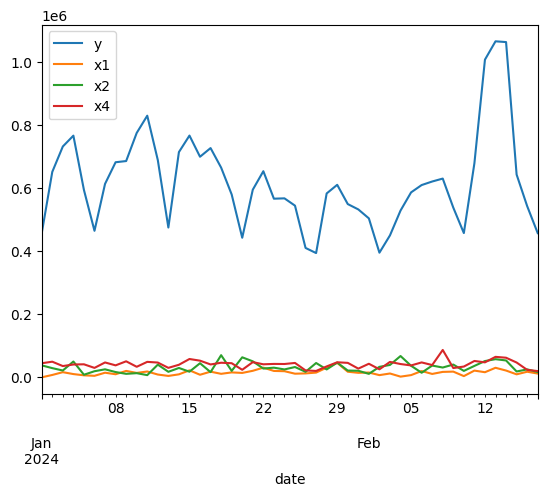

In [13]:
merged_df.plot()

In [14]:
ts_pre_period = [pd.to_datetime(date) for date in ["2024-01-01", "2024-01-29"]]
ts_post_period = [pd.to_datetime(date) for date in ["2024-01-30", "2024-02-17"]]

In [15]:
ts_impact = CausalImpact(merged_df, ts_pre_period, ts_post_period)

C:\Users\dlouzilova\AppData\Local\anaconda3\Lib\site-packages\causalimpact\data.py:263: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data.applymap(np.isreal).values.all():
Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`

Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


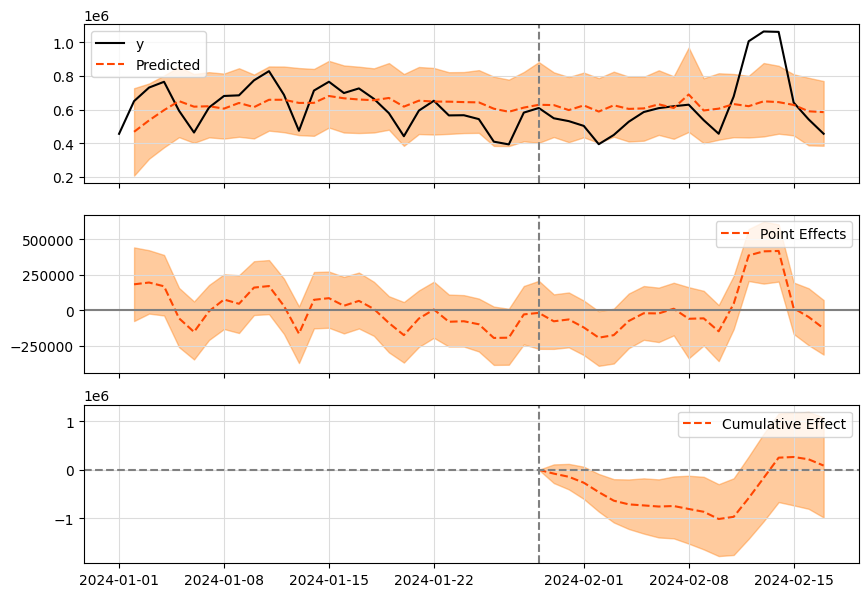

In [16]:
ts_impact.plot()

In [17]:
summary = ts_impact.summary()

In [18]:
print(summary)

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    623578.5           11847992.0
Prediction (s.d.)         618984.0 (28440.05)11760696.0 (540360.96)
95% CI                    [561543.75, 673026.72][10669331.18, 12787507.67]

Absolute effect (s.d.)    4594.5 (28440.05)  87296.0 (540360.96)
95% CI                    [-49448.22, 62034.75][-939515.67, 1178660.82]

Relative effect (s.d.)    0.74% (4.59%)      0.74% (4.59%)
95% CI                    [-7.99%, 10.02%]   [-7.99%, 10.02%]

Posterior tail-area probability p: 0.44
Posterior prob. of a causal effect: 56.44%

For more details run the command: print(impact.summary('report'))


# Sessions

In [19]:
sessions_df = df[['date', 'sessions']].copy()
sessions_control1 = df_control1[['date', 'sessions']].copy()
sessions_control2 = df_control2[['date', 'sessions']].copy()
sessions_control3 = df_control3[['date', 'sessions']].copy()
sessions_control4 = df_control4[['date', 'sessions']].copy()

In [20]:
# Convert the 'date' columns to datetime
sessions_df['date'] = pd.to_datetime(sessions_df['date'], format='%Y%m%d')
sessions_control1['date'] = pd.to_datetime(sessions_control1['date'], format='%Y%m%d')
sessions_control2['date'] = pd.to_datetime(sessions_control2['date'], format='%Y%m%d')
sessions_control3['date'] = pd.to_datetime(sessions_control3['date'], format='%Y%m%d')
sessions_control4['date'] = pd.to_datetime(sessions_control4['date'], format='%Y%m%d')

# Convert 'sessions' columns to float
sessions_df['sessions'] = sessions_df['sessions'].astype(float)
sessions_control1['sessions'] = sessions_control1['sessions'].astype(float)
sessions_control2['sessions'] = sessions_control2['sessions'].astype(float)
sessions_control3['sessions'] = sessions_control3['sessions'].astype(float)
sessions_control4['sessions'] = sessions_control4['sessions'].astype(float)

# Rename the 'sessions' column
sessions_df = sessions_df.rename(columns={'sessions': 'y'})
sessions_control1 = sessions_control1.rename(columns={'sessions': 'x1'})
sessions_control2 = sessions_control2.rename(columns={'sessions': 'x2'})
sessions_control3 = sessions_control3.rename(columns={'sessions': 'x3'})
sessions_control4 = sessions_control4.rename(columns={'sessions': 'x4'})

# Set 'date' as the index
sessions_df = sessions_df.set_index('date')
sessions_control1 = sessions_control1.set_index('date')
sessions_control2 = sessions_control2.set_index('date')
sessions_control3 = sessions_control3.set_index('date')
sessions_control4 = sessions_control4.set_index('date')

In [21]:
# Merge the dataframes
merge_df = sessions_df  # Initialize with the first dataframe

for df_controls in [sessions_control1, sessions_control2, sessions_control4]:
    merge_df = pd.merge(merge_df, df_controls, left_index=True, right_index=True, how='outer')

In [22]:
merge_df

,y,x1,x2,x4
date,,,,
2024-01-01,10185.0,3.0,1772.0,943.0
2024-01-02,16399.0,187.0,816.0,1039.0
2024-01-03,19102.0,257.0,791.0,856.0
2024-01-04,22642.0,265.0,4465.0,887.0
2024-01-05,17048.0,176.0,524.0,648.0
2024-01-06,15742.0,163.0,525.0,647.0
2024-01-07,17666.0,181.0,363.0,737.0
2024-01-08,19111.0,165.0,341.0,677.0
2024-01-09,18030.0,192.0,339.0,687.0


<Axes: xlabel='date'>

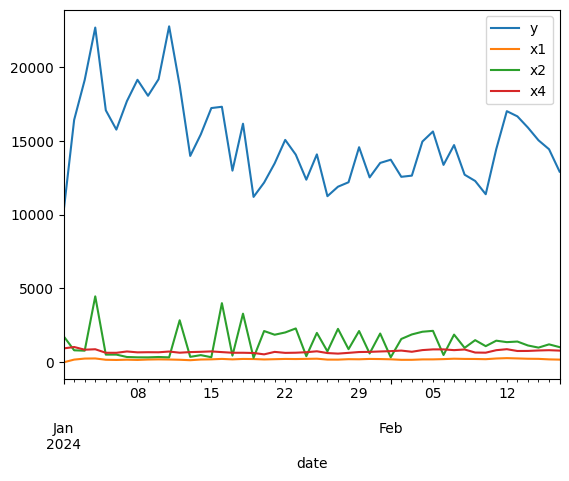

In [23]:
merge_df.plot()

In [24]:
t_impact = CausalImpact(merge_df, ts_pre_period, ts_post_period)

C:\Users\dlouzilova\AppData\Local\anaconda3\Lib\site-packages\causalimpact\data.py:263: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data.applymap(np.isreal).values.all():


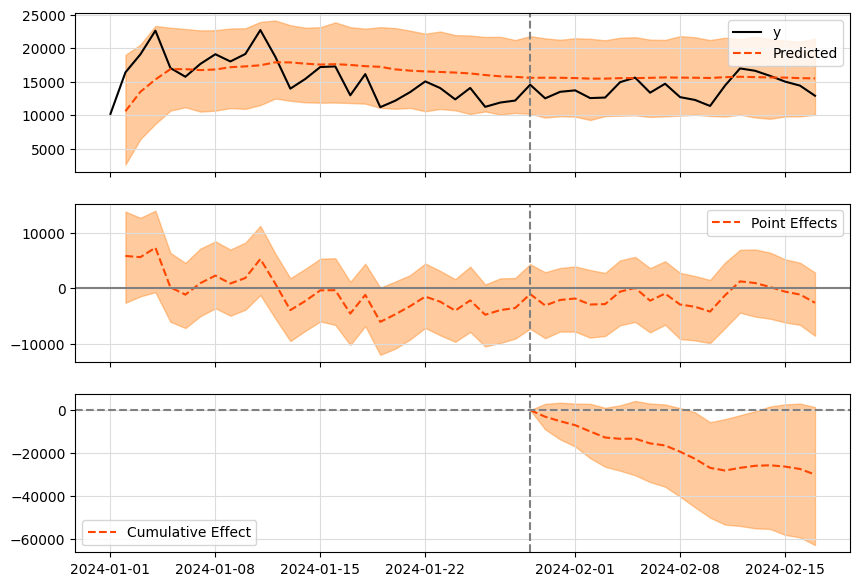

In [25]:
t_impact.plot()

In [26]:
print(t_impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    14004.05           266077.0
Prediction (s.d.)         15584.94 (825.5)   296113.91 (15684.44)
95% CI                    [13939.33, 17175.22][264847.23, 326329.1]

Absolute effect (s.d.)    -1580.89 (825.5)   -30036.91 (15684.44)
95% CI                    [-3171.16, 64.72]  [-60252.1, 1229.77]

Relative effect (s.d.)    -10.14% (5.3%)     -10.14% (5.3%)
95% CI                    [-20.35%, 0.42%]   [-20.35%, 0.42%]

Posterior tail-area probability p: 0.03
Posterior prob. of a causal effect: 97.2%

For more details run the command: print(impact.summary('report'))


# Transactions

In [27]:
transactions_df = df[['date', 'transactions']].copy()
transactions_control1 = df_control1[['date', 'transactions']].copy()
transactions_control2 = df_control2[['date', 'transactions']].copy()
transactions_control3 = df_control3[['date', 'transactions']].copy()
transactions_control4 = df_control4[['date', 'transactions']].copy()

In [28]:
# Convert the 'date' columns to datetime
transactions_df['date'] = pd.to_datetime(transactions_df['date'], format='%Y%m%d')
transactions_control1['date'] = pd.to_datetime(transactions_control1['date'], format='%Y%m%d')
transactions_control2['date'] = pd.to_datetime(transactions_control2['date'], format='%Y%m%d')
transactions_control3['date'] = pd.to_datetime(transactions_control3['date'], format='%Y%m%d')
transactions_control4['date'] = pd.to_datetime(transactions_control4['date'], format='%Y%m%d')

# Convert 'sessions' columns to float
transactions_df['transactions'] = transactions_df['transactions'].astype(float)
transactions_control1['transactions'] = transactions_control1['transactions'].astype(float)
transactions_control2['transactions'] = transactions_control2['transactions'].astype(float)
transactions_control3['transactions'] = transactions_control3['transactions'].astype(float)
transactions_control4['transactions'] = transactions_control4['transactions'].astype(float)

# Rename the 'sessions' column
transactions_df = transactions_df.rename(columns={'transactions': 'y'})
transactions_control1 = transactions_control1.rename(columns={'transactions': 'x1'})
transactions_control2 = transactions_control2.rename(columns={'transactions': 'x2'})
transactions_control3 = transactions_control3.rename(columns={'transactions': 'x3'})
transactions_control4 = transactions_control4.rename(columns={'transactions': 'x4'})

# Set 'date' as the index
transactions_df = transactions_df.set_index('date')
transactions_control1 =transactions_control1.set_index('date')
transactions_control2 = transactions_control2.set_index('date')
transactions_control3 = transactions_control3.set_index('date')
transactions_control4 = transactions_control4.set_index('date')

In [29]:
# Merge the dataframes
merg_df = transactions_df  # Initialize with the first dataframe

for df_controls in [transactions_control1, transactions_control2, transactions_control4]:
    merg_df = pd.merge(merg_df, df_controls, left_index=True, right_index=True, how='outer')

<Axes: xlabel='date'>

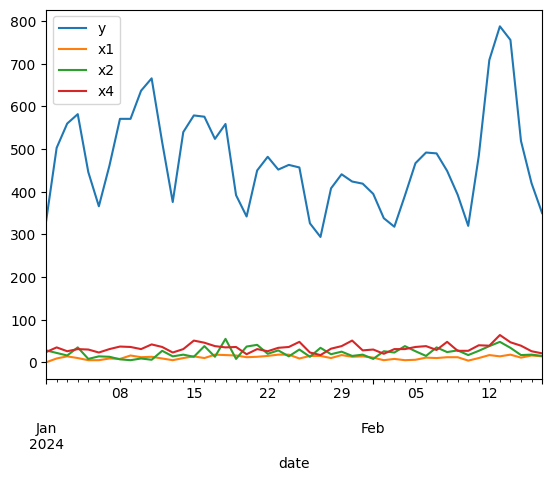

In [30]:
merg_df.plot()

In [31]:
impact = CausalImpact(merg_df, ts_pre_period, ts_post_period)

C:\Users\dlouzilova\AppData\Local\anaconda3\Lib\site-packages\causalimpact\data.py:263: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data.applymap(np.isreal).values.all():


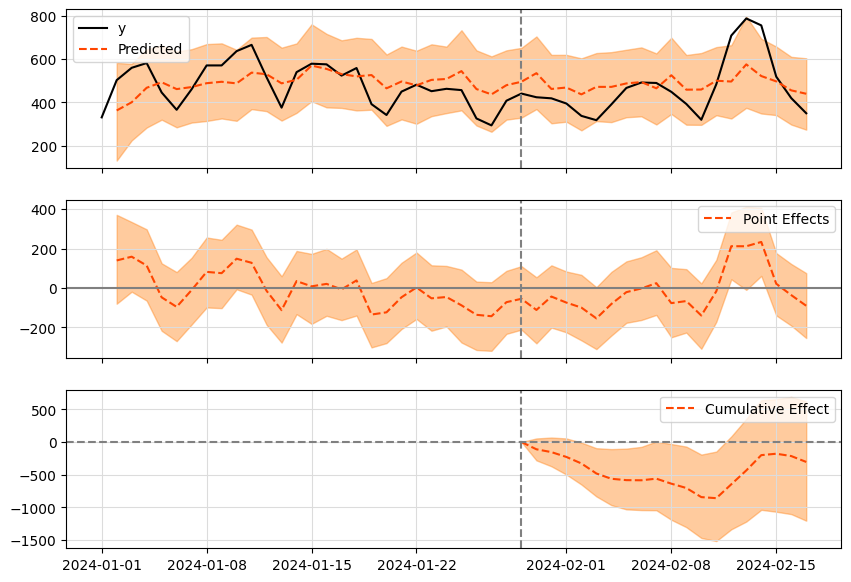

In [32]:
impact.plot()

In [33]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    469.58             8922.0
Prediction (s.d.)         485.63 (24.18)     9227.0 (459.4)
95% CI                    [437.62, 532.4]    [8314.78, 10115.6]

Absolute effect (s.d.)    -16.05 (24.18)     -305.0 (459.4)
95% CI                    [-62.82, 31.96]    [-1193.6, 607.22]

Relative effect (s.d.)    -3.31% (4.98%)     -3.31% (4.98%)
95% CI                    [-12.94%, 6.58%]   [-12.94%, 6.58%]

Posterior tail-area probability p: 0.24
Posterior prob. of a causal effect: 75.72%

For more details run the command: print(impact.summary('report'))


# purchase Margin

In [34]:
purchaseMargin_df = df[['date', 'customEvent:crc']].copy()
purchaseMargin_control1 = df_control1[['date', 'customEvent:crc']].copy()
purchaseMargin_control2 = df_control2[['date', 'customEvent:crc']].copy()
purchaseMargin_control3 = df_control3[['date', 'customEvent:crc']].copy()
purchaseMargin_control4 = df_control4[['date', 'customEvent:crc']].copy()

In [35]:
# Convert the 'date' columns to datetime
purchaseMargin_df['date'] = pd.to_datetime(purchaseMargin_df['date'], format='%Y%m%d')
purchaseMargin_control1['date'] = pd.to_datetime(purchaseMargin_control1['date'], format='%Y%m%d')
purchaseMargin_control2['date'] = pd.to_datetime(purchaseMargin_control2['date'], format='%Y%m%d')
purchaseMargin_control3['date'] = pd.to_datetime(purchaseMargin_control3['date'], format='%Y%m%d')
purchaseMargin_control4['date'] = pd.to_datetime(purchaseMargin_control4['date'], format='%Y%m%d')

# Convert 'sessions' columns to float
purchaseMargin_df['customEvent:crc'] = purchaseMargin_df['customEvent:crc'].astype(float)
purchaseMargin_control1['customEvent:crc'] = purchaseMargin_control1['customEvent:crc'].astype(float)
purchaseMargin_control2['customEvent:crc'] = purchaseMargin_control2['customEvent:crc'].astype(float)
purchaseMargin_control3['customEvent:crc'] = purchaseMargin_control3['customEvent:crc'].astype(float)
purchaseMargin_control4['customEvent:crc'] = purchaseMargin_control4['customEvent:crc'].astype(float)

# Rename the 'sessions' column
purchaseMargin_df = purchaseMargin_df.rename(columns={'customEvent:crc': 'y'})
purchaseMargin_control1 = purchaseMargin_control1.rename(columns={'customEvent:crc': 'x1'})
purchaseMargin_control2 = purchaseMargin_control2.rename(columns={'customEvent:crc': 'x2'})
purchaseMargin_control3 = purchaseMargin_control3.rename(columns={'customEvent:crc': 'x3'})
purchaseMargin_control4 = purchaseMargin_control4.rename(columns={'customEvent:crc': 'x4'})

# Set 'date' as the index
purchaseMargin_df = purchaseMargin_df.set_index('date')
purchaseMargin_control1 = purchaseMargin_control1.set_index('date')
purchaseMargin_control2 = purchaseMargin_control2.set_index('date')
purchaseMargin_control3 = purchaseMargin_control3.set_index('date')
purchaseMargin_control4 = purchaseMargin_control4.set_index('date')

In [36]:
# Merge the dataframes
merge2_df = purchaseMargin_df  # Initialize with the first dataframe

for df_controlp in [purchaseMargin_control1, purchaseMargin_control2, purchaseMargin_control4]:
    merge2_df = pd.merge(merge2_df, df_controlp, left_index=True, right_index=True, how='outer')

<Axes: xlabel='date'>

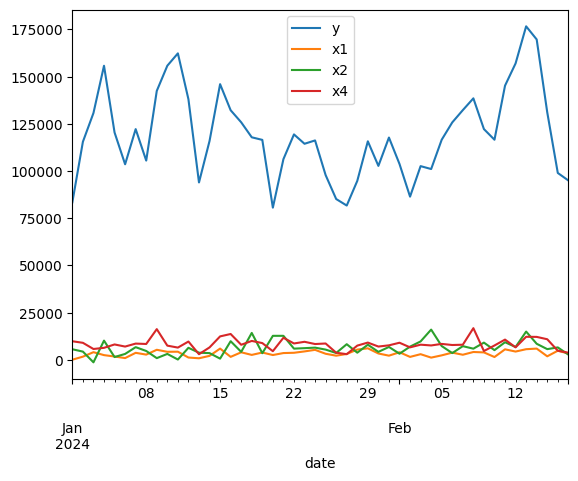

In [37]:
merge2_df.plot()

In [38]:
impactpm = CausalImpact(merge2_df, ts_pre_period, ts_post_period)

C:\Users\dlouzilova\AppData\Local\anaconda3\Lib\site-packages\causalimpact\data.py:263: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data.applymap(np.isreal).values.all():


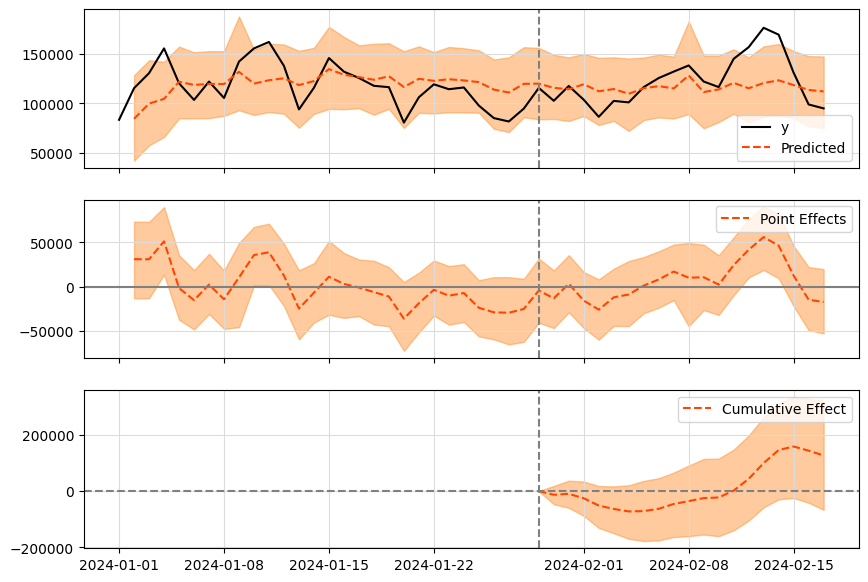

In [39]:
impactpm.plot()

In [40]:
print(impactpm.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    123132.33          2339514.25
Prediction (s.d.)         116489.52 (4940.42)2213301.0 (93867.93)
95% CI                    [106791.52, 126157.6][2029038.93, 2396994.52]

Absolute effect (s.d.)    6642.8 (4940.42)   126213.25 (93867.93)
95% CI                    [-3025.28, 16340.8][-57480.27, 310475.32]

Relative effect (s.d.)    5.7% (4.24%)       5.7% (4.24%)
95% CI                    [-2.6%, 14.03%]    [-2.6%, 14.03%]

Posterior tail-area probability p: 0.09
Posterior prob. of a causal effect: 91.11%

For more details run the command: print(impact.summary('report'))


# new users

In [41]:
newUsers_df = df[['date', 'newUsers']].copy()
newUsers_control1 = df_control1[['date', 'newUsers']].copy()
newUsers_control2 = df_control2[['date', 'newUsers']].copy()
newUsers_control3 = df_control3[['date', 'newUsers']].copy()
newUsers_control4 = df_control4[['date', 'newUsers']].copy()

In [42]:
# Convert the 'date' columns to datetime
newUsers_df['date'] = pd.to_datetime(newUsers_df['date'], format='%Y%m%d')
newUsers_control1['date'] = pd.to_datetime(newUsers_control1['date'], format='%Y%m%d')
newUsers_control2['date'] = pd.to_datetime(newUsers_control2['date'], format='%Y%m%d')
newUsers_control3['date'] = pd.to_datetime(newUsers_control3['date'], format='%Y%m%d')
newUsers_control4['date'] = pd.to_datetime(newUsers_control4['date'], format='%Y%m%d')

# Convert 'sessions' columns to float
newUsers_df['newUsers'] = newUsers_df['newUsers'].astype(float)
newUsers_control1['newUsers'] = newUsers_control1['newUsers'].astype(float)
newUsers_control2['newUsers'] = newUsers_control2['newUsers'].astype(float)
newUsers_control3['newUsers'] = newUsers_control3['newUsers'].astype(float)
newUsers_control4['newUsers'] = newUsers_control4['newUsers'].astype(float)

# Rename the 'sessions' column
newUsers_df = newUsers_df.rename(columns={'newUsers': 'y'})
newUsers_control1 = newUsers_control1.rename(columns={'newUsers': 'x1'})
newUsers_control2 = newUsers_control2.rename(columns={'newUsers': 'x2'})
newUsers_control3 = newUsers_control3.rename(columns={'newUsers': 'x3'})
newUsers_control4 = newUsers_control4.rename(columns={'newUsers': 'x4'})

# Set 'date' as the index
newUsers_df = newUsers_df.set_index('date')
newUsers_control1 = newUsers_control1.set_index('date')
newUsers_control2 = newUsers_control2.set_index('date')
newUsers_control3 = newUsers_control3.set_index('date')
newUsers_control4 = newUsers_control4.set_index('date')

In [43]:
# Merge the dataframes
merge3_df = newUsers_df  # Initialize with the first dataframe

for df_controlnu in [newUsers_control1, newUsers_control2, newUsers_control3, newUsers_control4]:
    merge3_df = pd.merge(merge3_df, df_controlnu, left_index=True, right_index=True, how='outer')

<Axes: xlabel='date'>

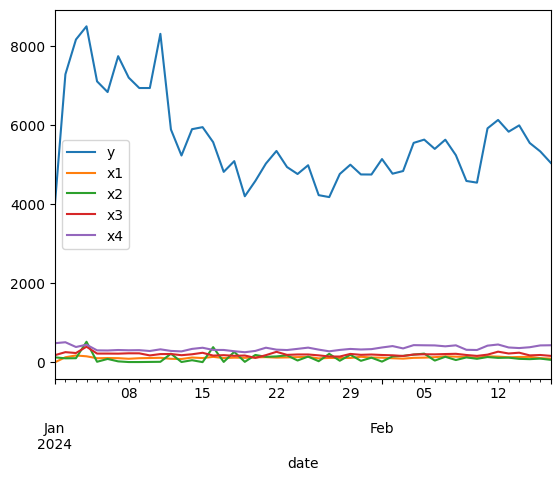

In [44]:
merge3_df.plot()

In [45]:
impactnu = CausalImpact(merge3_df, ts_pre_period, ts_post_period)

C:\Users\dlouzilova\AppData\Local\anaconda3\Lib\site-packages\causalimpact\data.py:263: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data.applymap(np.isreal).values.all():


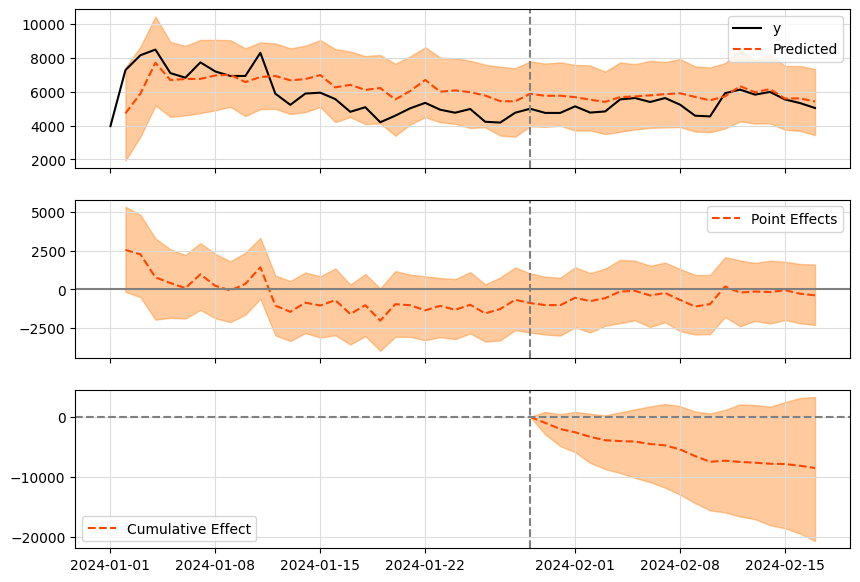

In [46]:
impactnu.plot()

In [47]:
print(impactnu.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    5288.53            100482.0
Prediction (s.d.)         5736.67 (316.28)   108996.72 (6009.37)
95% CI                    [5099.89, 6339.7]  [96897.93, 120454.23]

Absolute effect (s.d.)    -448.14 (316.28)   -8514.72 (6009.37)
95% CI                    [-1051.17, 188.64] [-19972.23, 3584.07]

Relative effect (s.d.)    -7.81% (5.51%)     -7.81% (5.51%)
95% CI                    [-18.32%, 3.29%]   [-18.32%, 3.29%]

Posterior tail-area probability p: 0.08
Posterior prob. of a causal effect: 91.81%

For more details run the command: print(impact.summary('report'))
